## Data Science Intern Challenge - Shopify

(This is from the google sheets):
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

###### Question 1: Given some sample data, write a program to answer the following: click here to access the required data set


In [41]:
import pandas as pd
import numpy as np

df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [42]:
t_aov = np.average(df['order_amount'])
t_aov #simply confirming the AOV with t meaning test


3145.128

Here's a potential problem. For instance, outliers could lead to increases in the average, therefore let's take a look at a scatter plot to view potential outliers that could exists in this data.

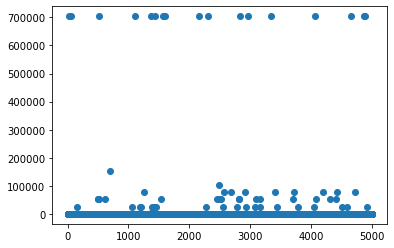

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

X = df['order_id'] #it counts up from 1 to max so it would be a good X axis
y = df['order_amount']

plt.scatter(X, y)

As you can see, the average range of the Y values exists belows the 100,000 mark. Let's take a look at what the data would look like if we got rid of some of these data points. Take a look at the supposed "straight line" that exists towards the bottom of the graph. That is where majority of the data sits. So all the dots which are clearly separated from one another are outliers. So let us take out all data that is above around 20,000.

302.58051448247926

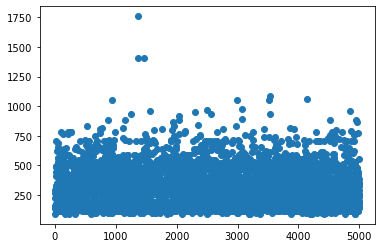

In [44]:
newdata1 = df[df['order_amount']<20000]

X = newdata1['order_id'] #it counts up from 1 to max so it would be a good X axis
y = newdata1['order_amount']

plt.scatter(X, y)
newdata1_aov = np.average(newdata1['order_amount'])
newdata1_aov

Are these outliers really problematic? The order amount and the total items are relative to one another. Therefore, let us get the order amount for single individual amounts.

In [45]:
newdata2 = df
newdata2['order_amount'] = newdata2['order_amount'] / newdata2['total_items']
newdata2 = newdata2.drop('total_items', axis=1) #since everything is accounting for 1 item.
newdata2.head()

,order_id,shop_id,user_id,order_amount,payment_method,created_at
0,1,53,746,112.0,cash,2017-03-13 12:36:56
1,2,92,925,90.0,cash,2017-03-03 17:38:52
2,3,44,861,144.0,cash,2017-03-14 4:23:56
3,4,18,935,156.0,credit_card,2017-03-26 12:43:37
4,5,18,883,156.0,credit_card,2017-03-01 4:35:11


Since this all takes place in March of 2017, there will be no need to take into consideration of the duration. Therefore, let's take a look at the final AOV.

In [46]:
final_aov = np.average(newdata2['order_amount'])

final_aov

387.7428

So the correct analysis would be 387.7 for the AOV (Average Order Value).

##### For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

##### How many orders were shipped by Speedy Express in total?



SELECT COUNT(OrderID) FROM Orders WHERE ShipperID = 1;

There are 54 Orders shipped by Speedy Express.

##### What is the last name of the employee with the most orders?


SELECT MAX(`Number Of Orders`) AS 'Number of Orders', `Orders`.EmployeeID, (SELECT LastName FROM Employees WHERE Employees.EmployeeID = `Orders`.EmployeeID) FROM (SELECT EmployeeID AS 'EmployeeID', COUNT(EmployeeID) AS 'Number of Orders' FROM Orders GROUP BY EmployeeID) AS `Orders` JOIN Employees;

The last name of the employee with the most orders is Peacock.


##### What product was ordered the most by customers in Germany?


SELECT MAX("Number of Products"), ProductName 
FROM (SELECT Products.ProductName, COUNT(Products.ProductName) AS "Number of Products" FROM Orders 
                                        JOIN Customers ON Customers.CustomerID=Orders.CustomerID 
                                        JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID
                                        JOIN Products ON Products.ProductID = OrderDetails.ProductID
                                        WHERE Customers.Country = "Germany" GROUP BY Products.ProductName);


The product that was ordered most by customers in Germany was Gorgonzola Telino. 